## Essay Perplexity EDA
#### DUPE - Detection Undermining via Prompt Engineering

James Weichert and Chinecherem Dimobi

CS 5914 _Fall 2023_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [24]:
# Import perplexity function from perplexity.py (in same directory)
from perplexity import perplexity

/opt/anaconda3/lib/python3.8/site-packages/transformers/models/auto/tokenization_auto.py:655: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/transformers/models/auto/configuration_auto.py:1020: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/transformers/utils/hub.py:374: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Using pad_token, but it is not set yet.


In [2]:
essays = pd.read_csv("Data/human_essays.csv")
essays

,Discipline,Paper Type,Level,Title,Text,Zero GPT AI % 750 Chars,Zero GPT AI % 1500 Chars,Zero GPT AI % 5000 Chars,Zero GPT AI % Full Text,Characters
0,English,Argumentative Essay,Undergraduate,The Vicar of Wakefield as a Failed Morality Story,Morality stories and plays that espouse Christ...,0.00,0.00,0.00,1.48,11115
1,English,Argumentative Essay,Undergraduate,Governmental Funding for the Development of Se...,"At the end of 2006, over 39.5 million people w...",50.19,68.22,35.78,35.13,20057
2,English,Argumentative Essay,Undergraduate,Who Is God?,One common problem for the Christian tradition...,25.70,12.51,3.95,1.57,12773
3,English,Argumentative Essay,Undergraduate,The Absolute Necessity of College-Level Writin...,"Reading Mike Rose's article, The Language of E...",51.73,37.99,21.81,23.01,7156
4,English,Argumentative Essay,Undergraduate,People or Property?,"In several of Shakespeare's plays, father – da...",0.00,0.00,9.35,15.63,9956
...,...,...,...,...,...,...,...,...,...,...
207,Philosophy,Report,Undergraduate,The composition of the Earth,"Thales, argued to be the first philosopher by ...",48.84,25.13,8.08,9.02,7993
208,Philosophy,Report,Undergraduate,God and Omnipotence,According to traditional theology God must be ...,100.00,67.58,43.64,52.84,9508
209,Philosophy,Report,Undergraduate,Question 9: Determinism and Free Will,"At first glance, the question as to whether hu...",56.23,73.50,56.18,43.33,10150
210,Philosophy,Report,Undergraduate,Hume and Smith on Justice,Adam Smith and David Hume agree that rules of ...,0.00,8.59,2.62,2.56,25055


In [26]:
def compute_perplexities(df, verbose=False):

    text_perplexities = np.array([])

    for i in range(len(df)):

        if verbose:
            print("==== Essay #" + str(i + 1) + " ====")

        text = df.iloc[i]['Text'][:15000] # Limit to first 15,000 characters

        text_perplexities = np.append(text_perplexities, perplexity(text))

    return text_perplexities

In [ ]:
# Computes perplexity scores for all 213 essays.
# THIS CELL COULD TAKE 1-2 *HOURS* TO RUN.

# Uncomment line below to compute perplexities
# essay_perplexities = compute_perplexities(essays, verbose=True)

In [7]:
# If not computing perplexities from scratch, 
#load the pre-generated perplexity scores from `human_essays_perplexity.csv`, `gpt_essays_perplexity.csv`
# and `paraphrased_essays_perplexity.csv`

human_essays = pd.read_csv("Data/human_essays_perplexity.csv")
gpt_essays = pd.read_csv("Data/gpt_essays_perplexity.csv")

# Perplexity Paraphrased Essays
paraphrased_essays = pd.read_csv("Data/paraphrased_essays_perplexity.csv")

human_essay_perplexities = human_essays['Perplexity']
gpt_essay_perplexities = gpt_essays['Perplexity']
paraphrased_essay_perplexities = paraphrased_essays['Perplexity']

#### Distribution of Perplexities

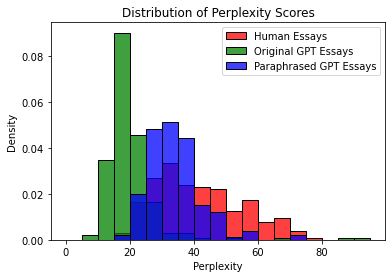

In [11]:
sns.histplot(human_essays, x="Perplexity", stat='density', bins= np.arange(0, 100, 5), color="red", label="Human Essays")
sns.histplot(gpt_essays, x='Perplexity', stat='density', bins=np.arange(0, 100, 5), color="green", label="Original GPT Essays")
sns.histplot(paraphrased_essays, x="Perplexity", stat="density", bins=np.arange(0, 100, 5), color="blue", label="Paraphrased GPT Essays")

plt.legend()
plt.title("Distribution of Perplexity Scores");

In [12]:
human_essay_perplexities.mean()

42.54258308244117

In [13]:
gpt_essay_perplexities.mean()

21.170623402793563

In [14]:
paraphrased_essay_perplexities.mean()

37.502183236533064

<hr>

#### Effect of Perplexity on ZeroGPT AI %

Correlation Coefficient: -0.5975586456474836


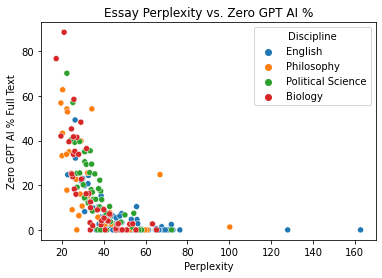

In [29]:
sns.scatterplot(data = human_essays, x = "Perplexity", y = human_essays.columns[9],
                hue = "Discipline")

plt.title("Essay Perplexity vs. ZeroGPT AI %");
print("Correlation Coefficient:", np.corrcoef(human_essays['Perplexity'], human_essays['Zero GPT AI % Full Text'])[0][1])